Data upload

In [3]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
uploaded= files.upload()

Mounted at /content/drive


Saving train_eda.csv to train_eda.csv


Missing value check


In [4]:
import pandas as pd
df=pd.read_csv('train_eda.csv')
missing_values = df.isnull().sum()
print("Columns with missing values:")
for column, count in missing_values.items():
    if count > 0:
        print(f"{column}: {count} missing values")

Columns with missing values:


Outliers Determination


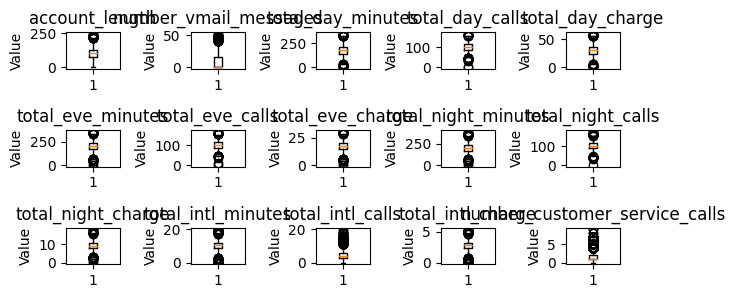

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_columns = df.select_dtypes(include=['number'])
for i, attribute in enumerate(numerical_columns):
    plt.subplot(5 ,5, i + 1)
    plt.boxplot(df[attribute])
    plt.title(attribute)
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

Distribution


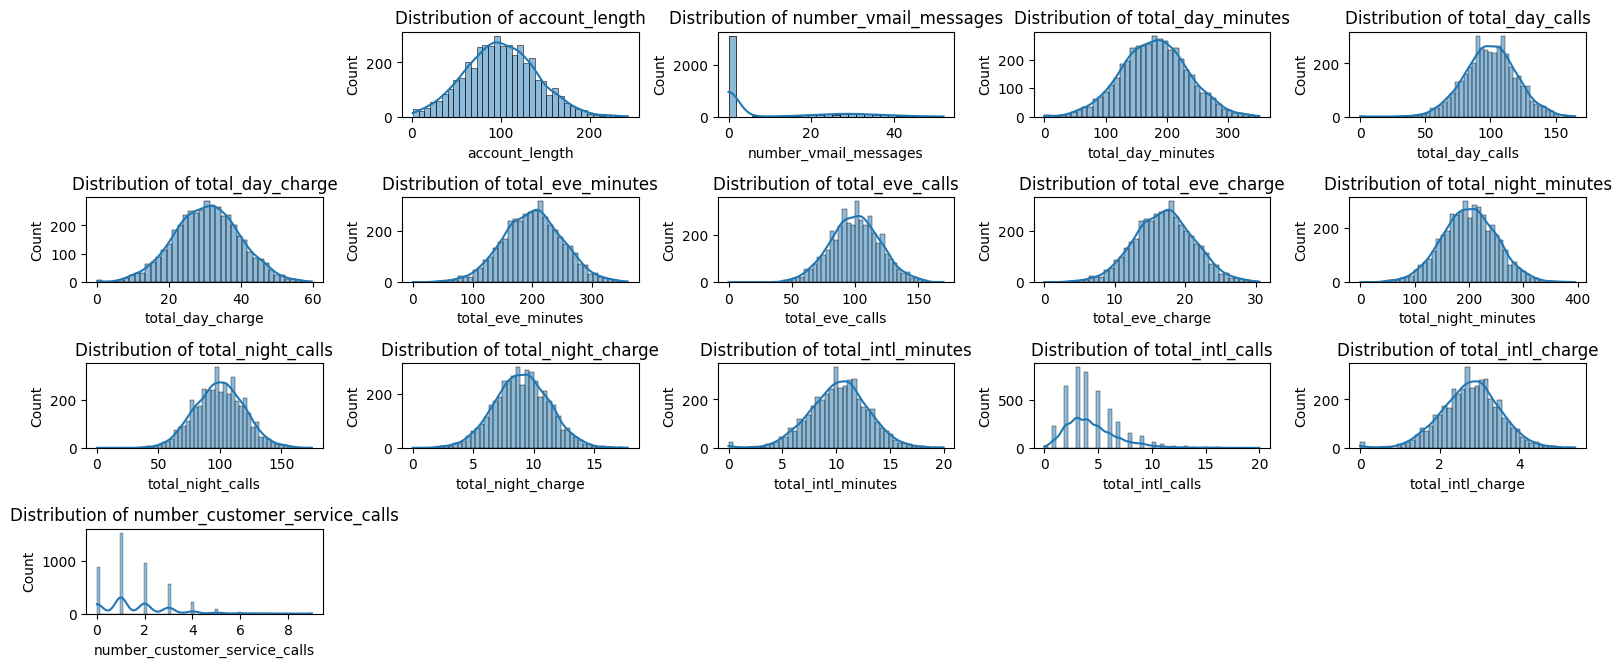

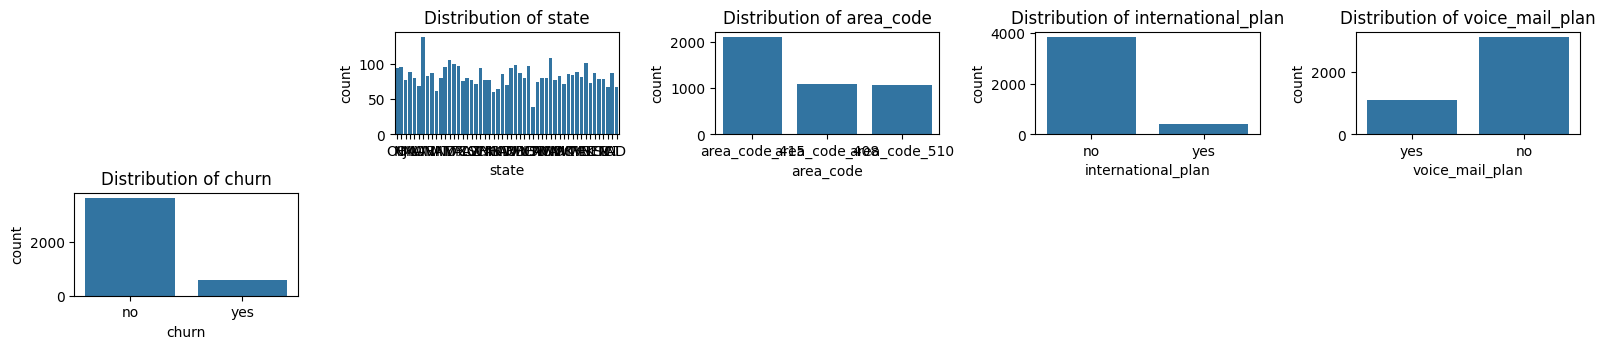

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(16, 8)) #numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 5, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8)) #categorical column
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(5, 5, i+1)
    sns.countplot(x=df[column])
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

Relationships Using Univariate


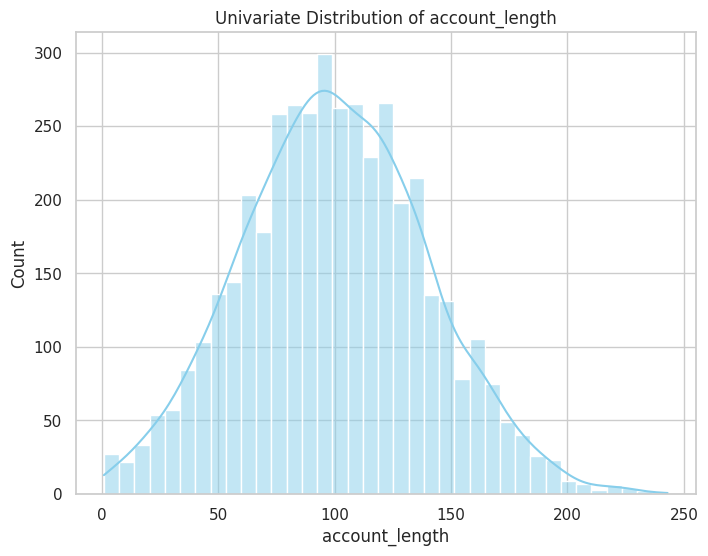

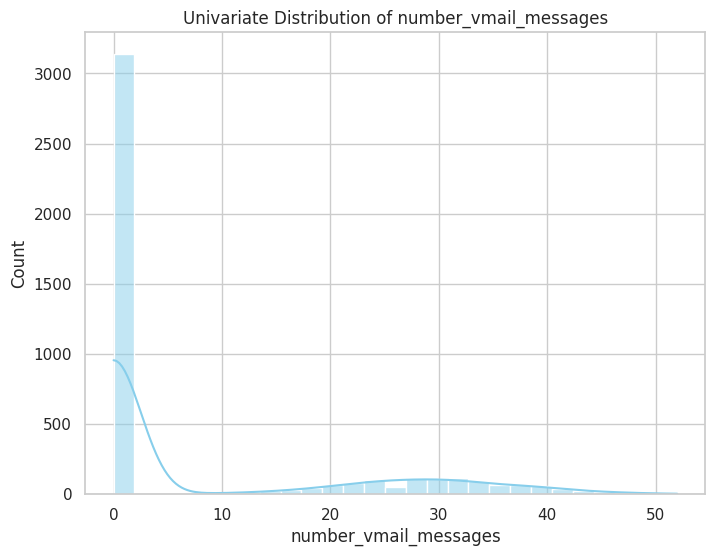

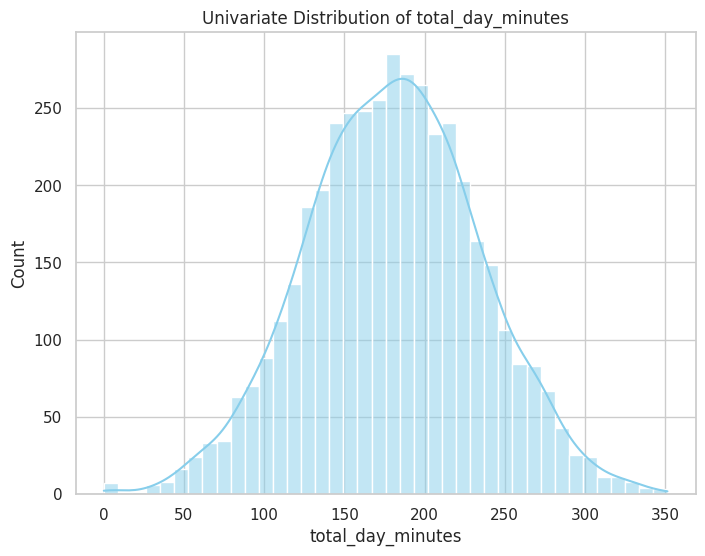

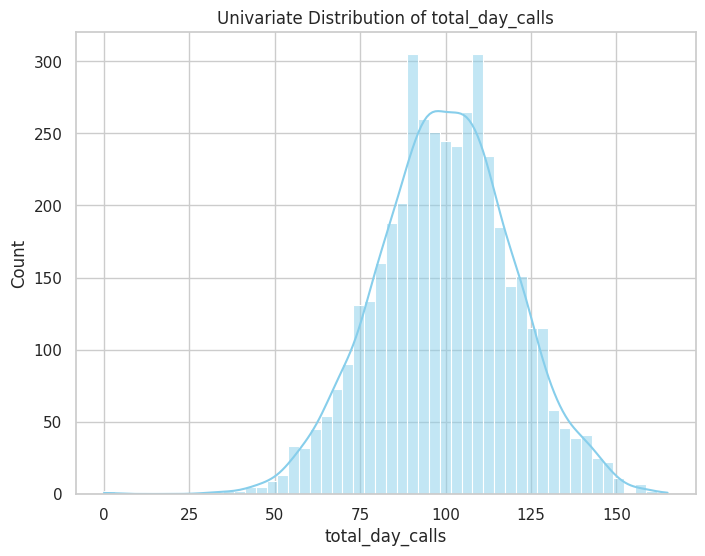

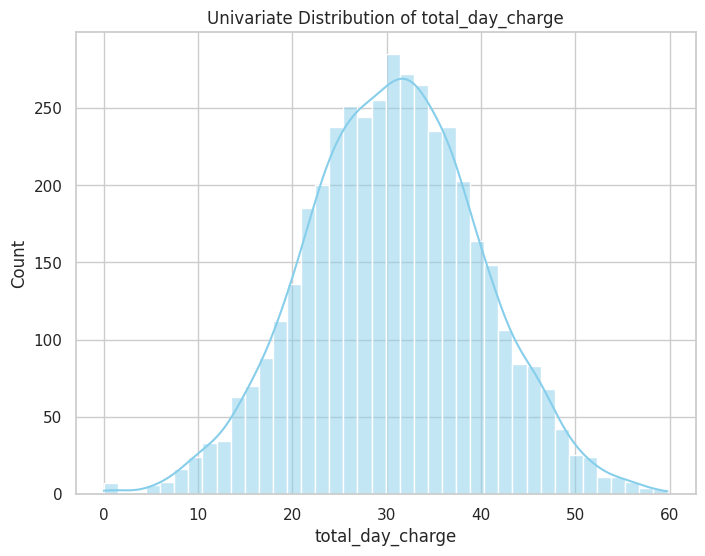

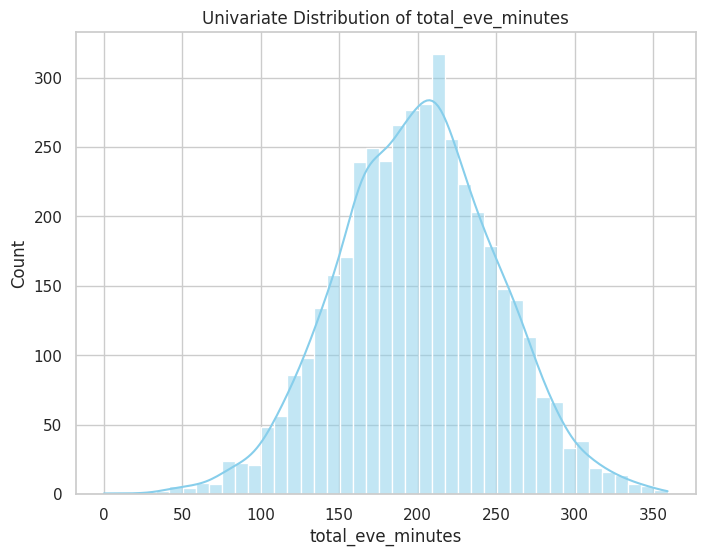

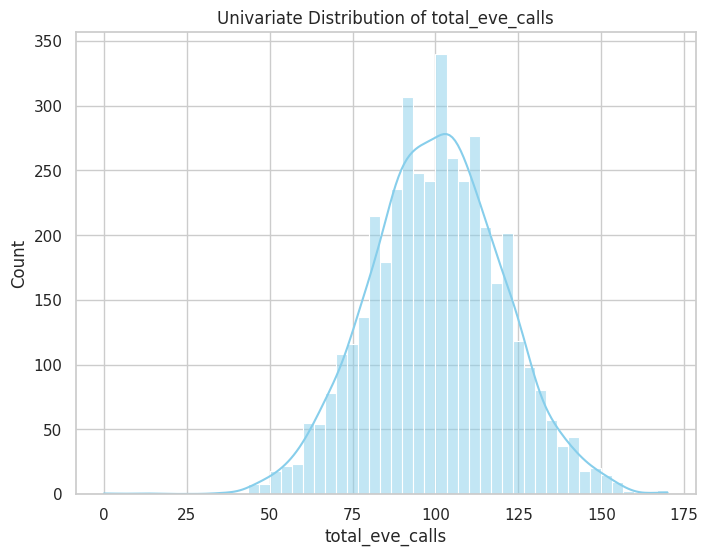

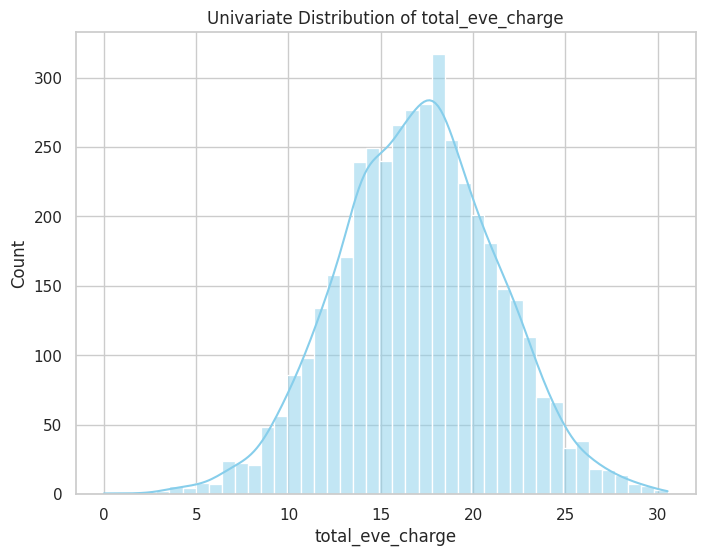

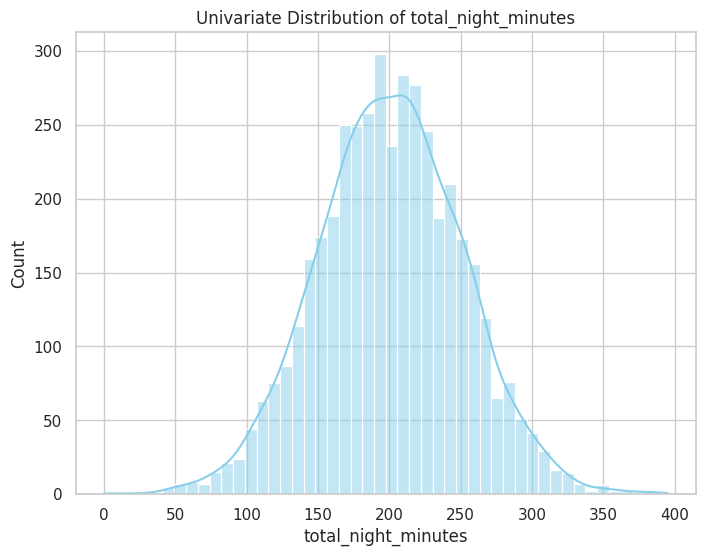

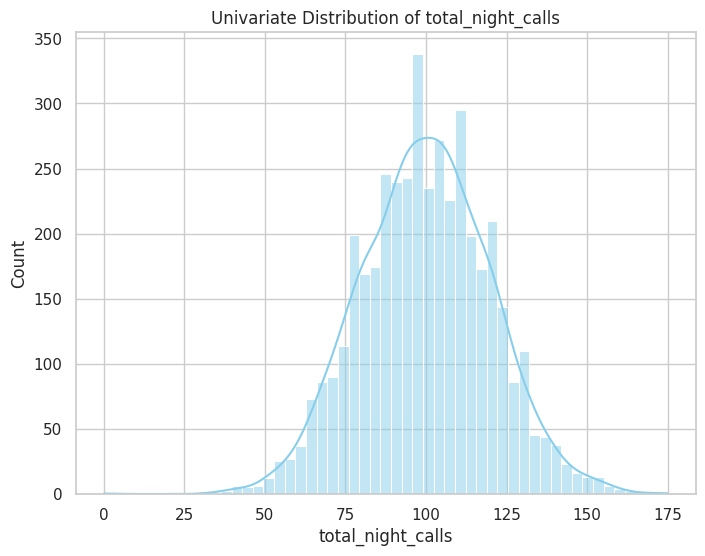

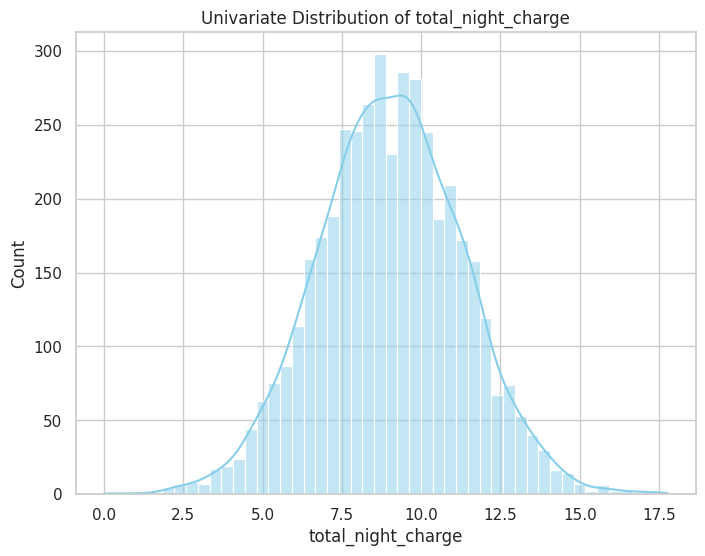

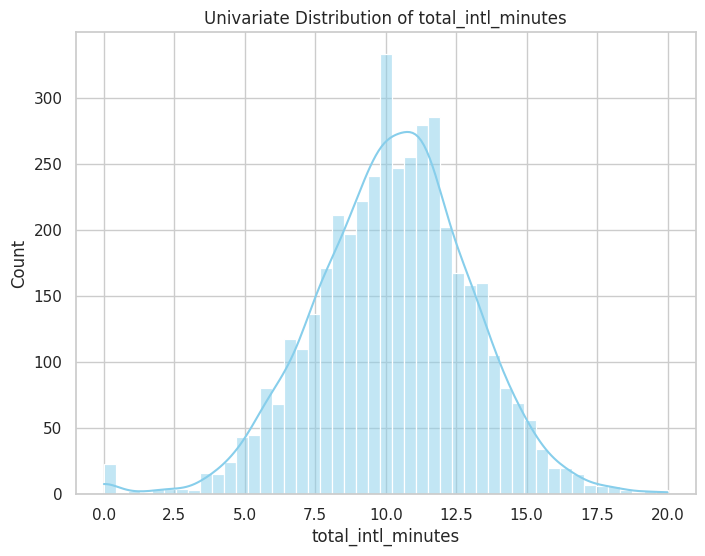

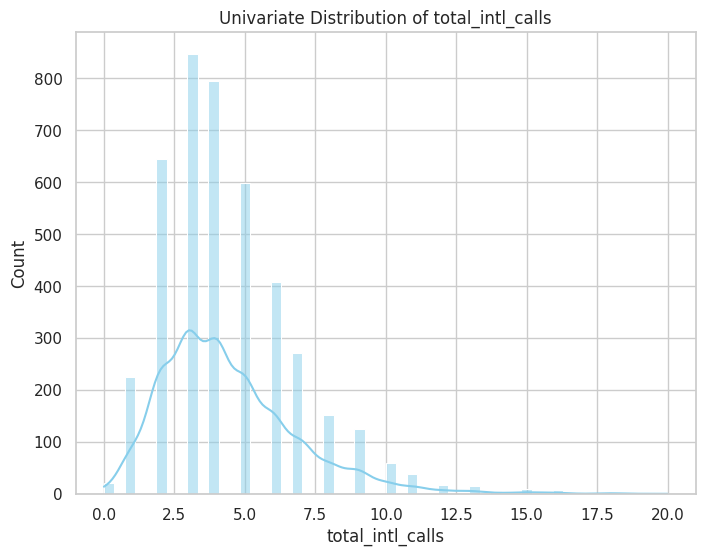

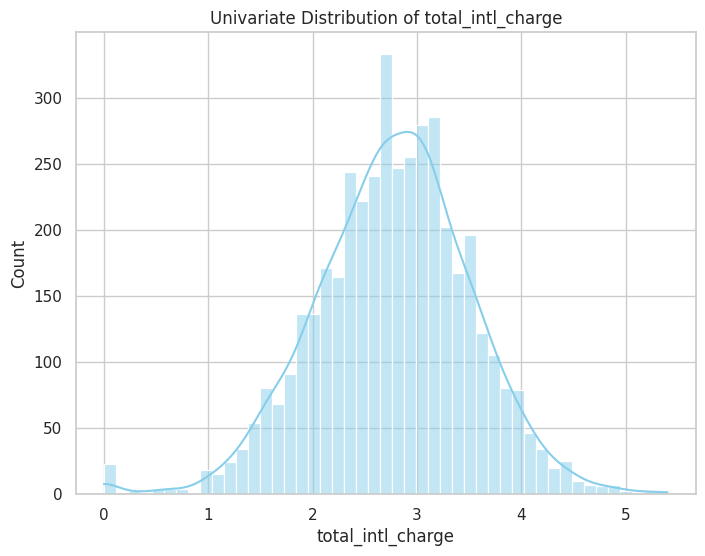

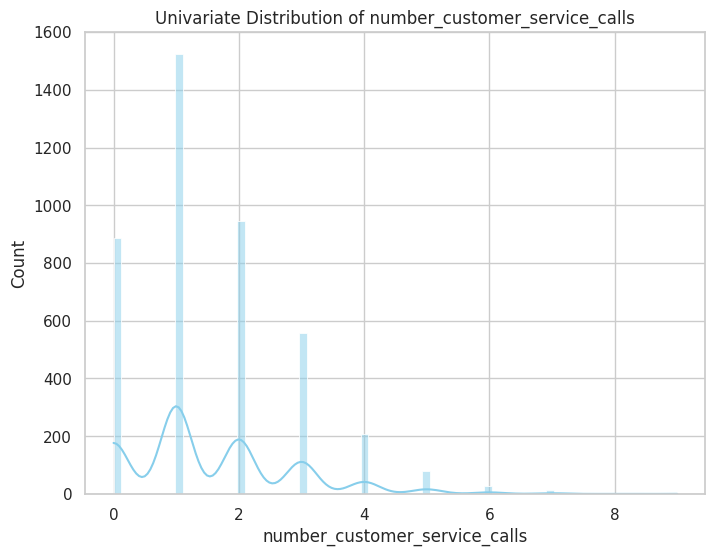

<ipython-input-7-fad1649aad1e>:11: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.countplot(x=column, data=df, palette='Set2')


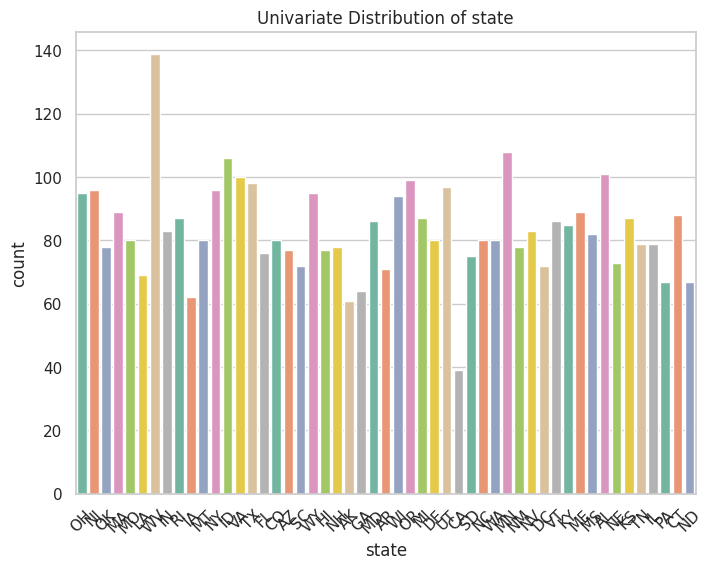

<ipython-input-7-fad1649aad1e>:11: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.countplot(x=column, data=df, palette='Set2')


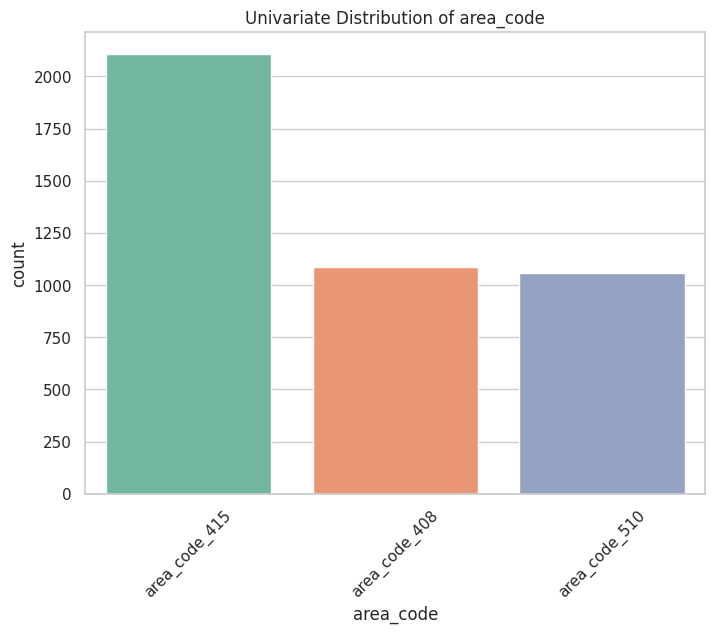

<ipython-input-7-fad1649aad1e>:11: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.countplot(x=column, data=df, palette='Set2')


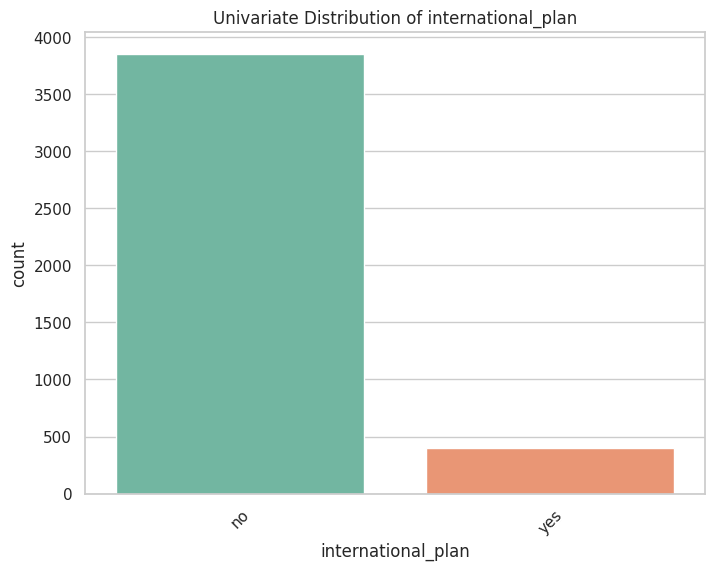

<ipython-input-7-fad1649aad1e>:11: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.countplot(x=column, data=df, palette='Set2')


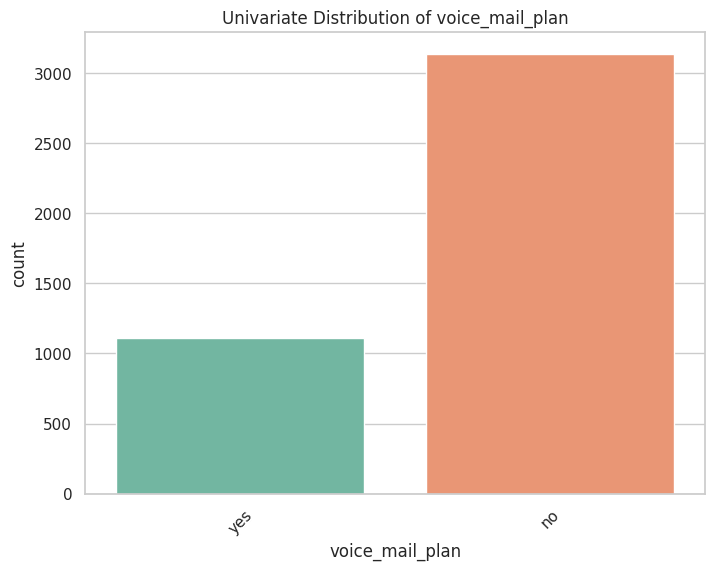

<ipython-input-7-fad1649aad1e>:11: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.countplot(x=column, data=df, palette='Set2')


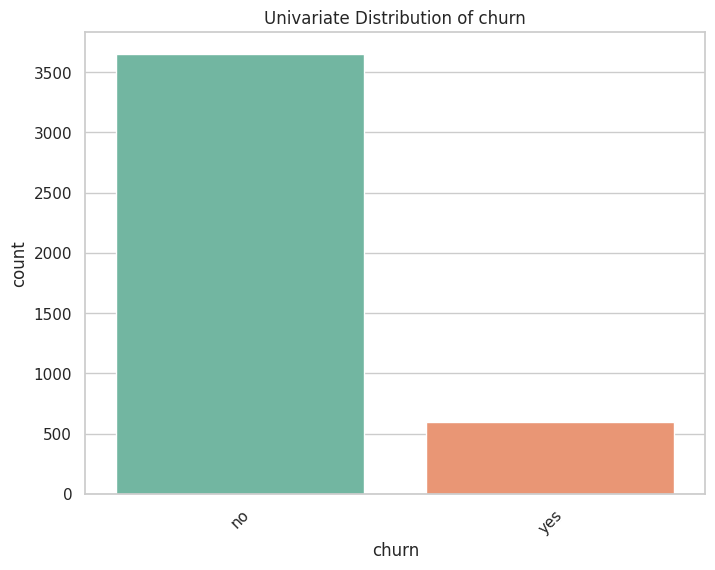

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
for column in df.select_dtypes(include='number').columns: #numerical
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Univariate Distribution of {column}')
    plt.show()
for column in df.select_dtypes(include='object').columns: #categorical
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df, palette='Set2')
    plt.title(f'Univariate Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

For combination relationship using Multivariate


<ipython-input-8-cd7aaab3db68>:6: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.stripplot(x='area_code', y='number_vmail_messages', data=df, jitter=True, palette='Set2') #graph details


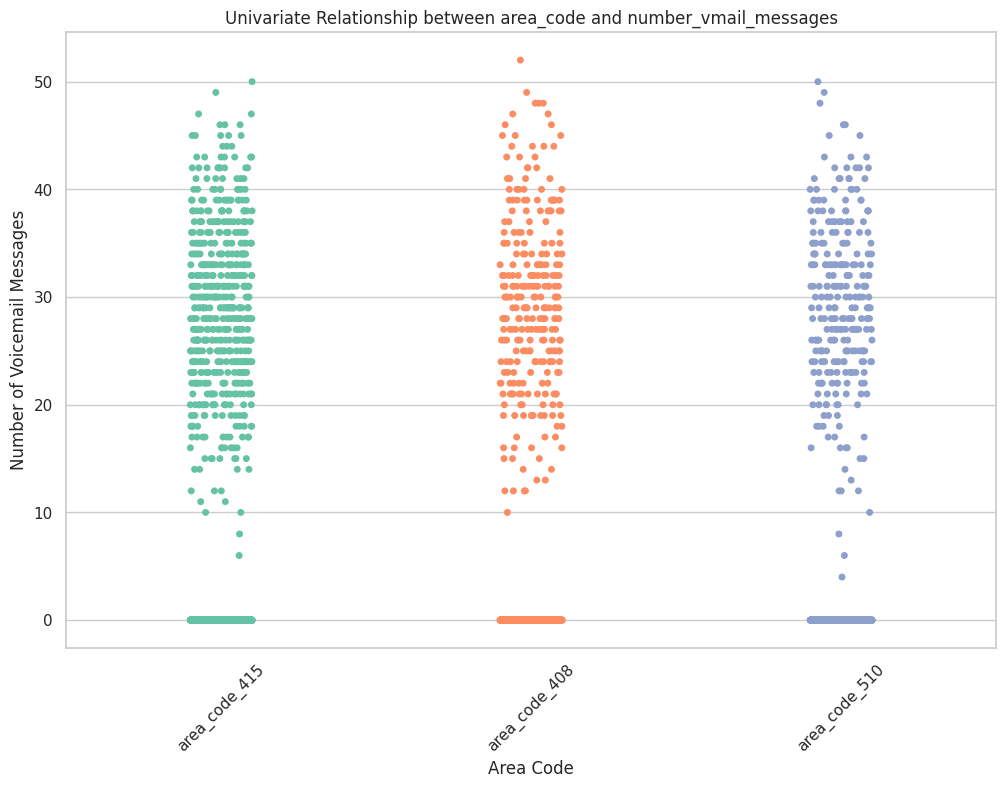

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid") #background
plt.figure(figsize=(12, 8))
sns.stripplot(x='area_code', y='number_vmail_messages', data=df, jitter=True, palette='Set2') #graph details
plt.title('Univariate Relationship between area_code and number_vmail_messages')
plt.xlabel('Area Code')
plt.ylabel('Number of Voicemail Messages')
plt.xticks(rotation=45)
plt.show()

Forming Clusters using K Means on Account length and evening Charge

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(


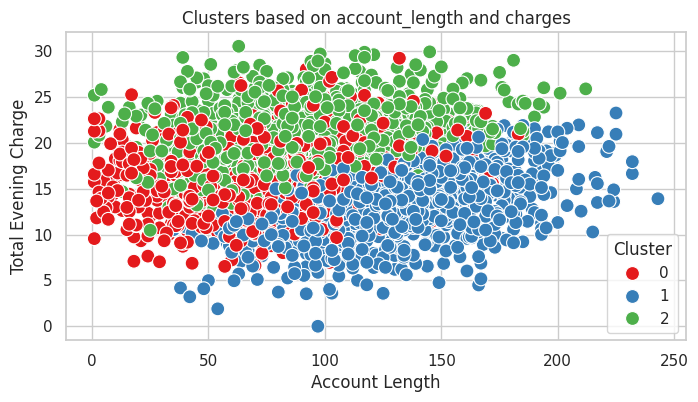

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
df=pd.read_csv('train_eda.csv')
selected_columns = ['account_length', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']
data = df[selected_columns]
scaler = StandardScaler() #standadization
scaled_data = scaler.fit_transform(data)
kmeans = KMeans(n_clusters=3, random_state=42) #kmeans
df['cluster'] = kmeans.fit_predict(scaled_data)
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.scatterplot(x='account_length', y='total_eve_charge', hue='cluster', data=df, palette='Set1', s=100)
plt.title('Clusters based on account_length and charges')
plt.xlabel('Account Length')
plt.ylabel('Total Evening Charge')
plt.legend(title='Cluster')
plt.show()

Linear Regression [Target variable = Churn Rate]

Mean Squared Error: 0.12033203211797545


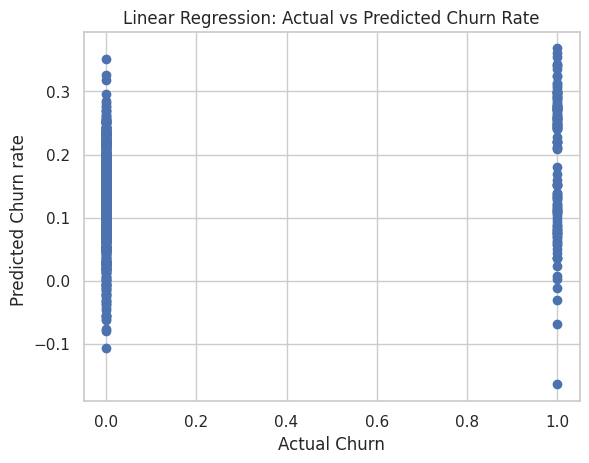

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#to convert churn to numerical using Label Encoder
from sklearn.preprocessing import LabelEncoder
churn_column = df['churn']
label_encoder = LabelEncoder()
encoded_churn = label_encoder.fit_transform(churn_column)
df['churn'] = encoded_churn


X = df[['total_day_charge', 'total_eve_charge', 'total_night_charge','total_intl_charge']]
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Churn')
plt.ylabel('Predicted Churn rate ')
plt.title('Linear Regression: Actual vs Predicted Churn Rate')
plt.show()

Agglomerative Clustering

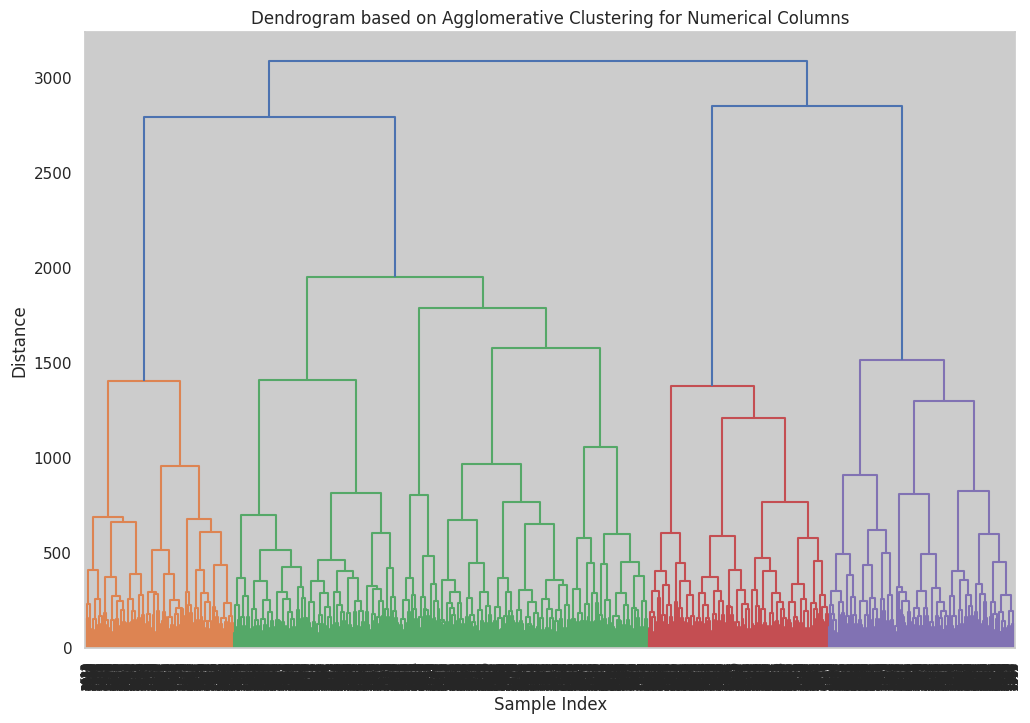

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
df=pd.read_csv('train_eda.csv')
numerical_columns = df.select_dtypes(include=['number']) #numerical column
linkage_matrix = linkage(numerical_columns, method='ward', metric='euclidean') #linkage matrix is proximity matrix
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=numerical_columns.index, orientation='top', leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram based on Agglomerative Clustering for Numerical Columns')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Density Based Spatial Clusturing

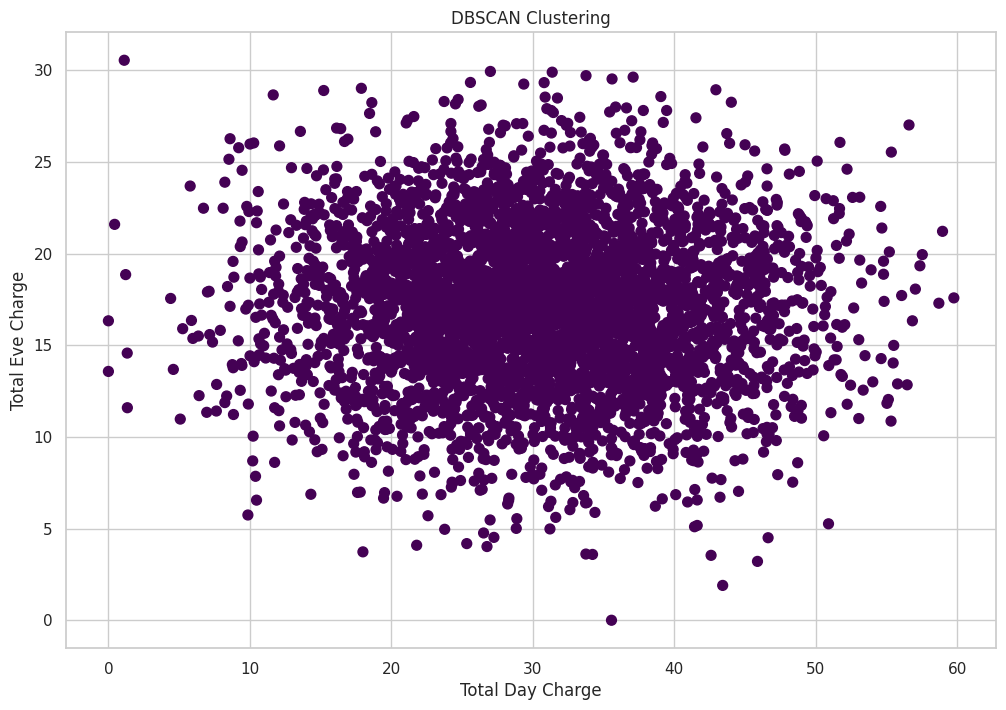

In [12]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df=pd.read_csv('train_eda.csv')
numerical_columns = df.select_dtypes(include='number')
scaler = StandardScaler() #to ensures that all features have the same scale, preventing certain features from dominating the distance metric
scaled_data = scaler.fit_transform(numerical_columns)
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster'] = dbscan.fit_predict(scaled_data)
plt.figure(figsize=(12, 8))
plt.scatter(df['total_day_charge'], df['total_eve_charge'], c=df['cluster'], cmap='viridis', s=50)
plt.xlabel('Total Day Charge')
plt.ylabel('Total Eve Charge')
plt.title('DBSCAN Clustering')
plt.show()


Silhouette Score

In [21]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
df = pd.read_csv('train_eda.csv')
numerical_columns = df.select_dtypes(include='number')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_columns)
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['cluster'] = dbscan.fit_predict(scaled_data)
unique_labels = df['cluster'].unique()
if len(unique_labels) > 1:
    silhouette_avg = silhouette_score(scaled_data, df['cluster'])
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("DBSCAN resulted in a single cluster, silhouette score cannot be calculated.")

Silhouette Score: -0.32290103899531947
